In [21]:
# import dependencies
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("data/train.csv")

In [24]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [25]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [26]:
data['isAlone'] = (data['FamilySize'] == 1).astype(int)

In [27]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S' : 2})

In [28]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  FamilySize  isAlone  
0         A/5 21171   7.2500   NaN       2.0           2        0  
1          PC 17599  71.2833   C85       0.0           2        0  
2  STON/O2. 3101282   7.9250   NaN       2.0           1        1  
3            113803  53.

In [29]:
numeric_data = data.select_dtypes(include=[float, int])

In [30]:
correlation_matrix = numeric_data.corr()

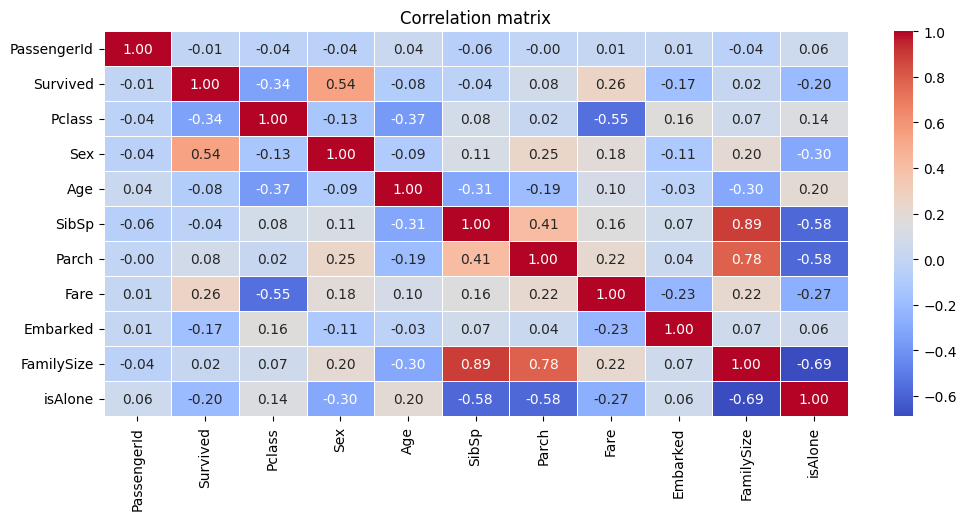

In [31]:
plt.figure(figsize=(12, 5))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.2f', linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

#### inference from data
- as expected, there is no correlation in between passenger ID and any other header
- the survived value seems to be positively correlated to the fare (0.26 +ve correlation)
- Pclass is negatively correlated with all survived, age and fare
    - what this tells us that the P class is negatively correlated with the survival rate
    - what this also tells us is that the older people were more likely to buy higher class tickets (lower Pclass value)
    - and Pclass had a (rather obvious) negative correlation where the lower the Pclass(higher the class) the higher the ticket fare
    - age negatively correlated with sibsp and Parch, indicating older passengers of the titanic were more likely to travel alone

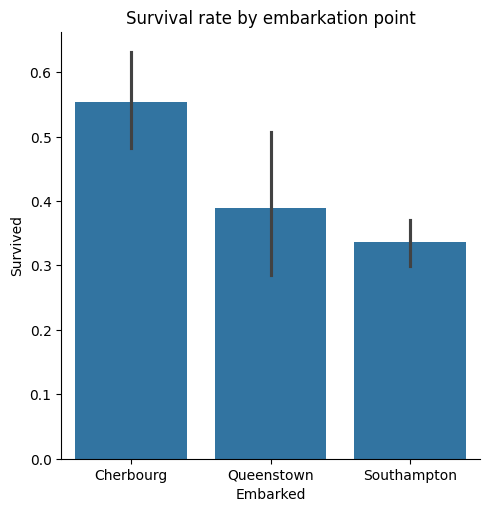

In [34]:
sb.catplot(x='Embarked', y='Survived', data=data, kind='bar', height=5)
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.title('Survival rate by embarkation point')
plt.show()

In [35]:
passenger_embarked_info = numeric_data.groupby(['Embarked']).mean()

In [36]:
print(passenger_embarked_info)

          PassengerId  Survived    Pclass       Sex        Age     SibSp  \
Embarked                                                                   
0.0        445.357143  0.553571  1.886905  0.434524  30.814769  0.386905   
1.0        417.896104  0.389610  2.909091  0.467532  28.089286  0.428571   
2.0        449.527950  0.336957  2.350932  0.315217  29.445397  0.571429   

             Parch       Fare  FamilySize   isAlone  
Embarked                                             
0.0       0.363095  59.954144    1.750000  0.505952  
1.0       0.168831  13.276030    1.597403  0.740260  
2.0       0.413043  27.079812    1.984472  0.610248  


> 0 : cherbourg, 1 : Queenstown, 2 : southampton

from this data, we can see that the passengers boarding the ship from cherbourg were more likely to survive the tragedy.
Not only this, passengers from cherbourg were also more likely to pay higher fare and buy tickets in the more expensive classes of the ship (lower Pclass value). Passengers from Cherbourg were also more least likely to be travelling solo, as suggested by the lowest isAlone mean value among the 3 embarkation points

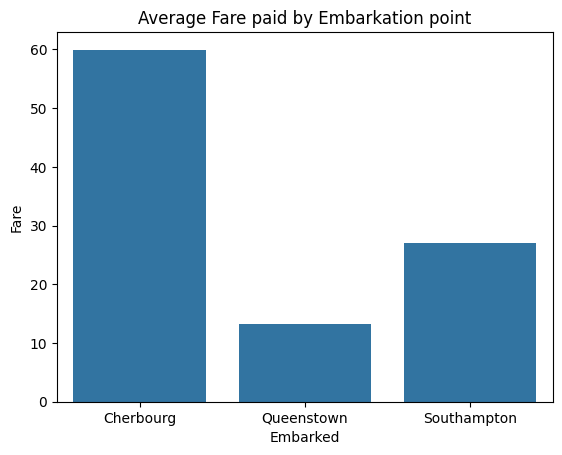

In [37]:
sb.barplot(x='Embarked', y='Fare', data=passenger_embarked_info)
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.title("Average Fare paid by Embarkation point")
plt.show()

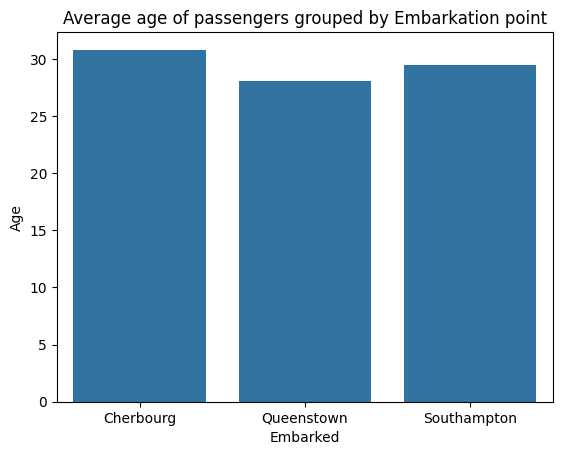

In [38]:
sb.barplot(x='Embarked', y='Age', data=passenger_embarked_info)
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.title("Average age of passengers grouped by Embarkation point")
plt.show()

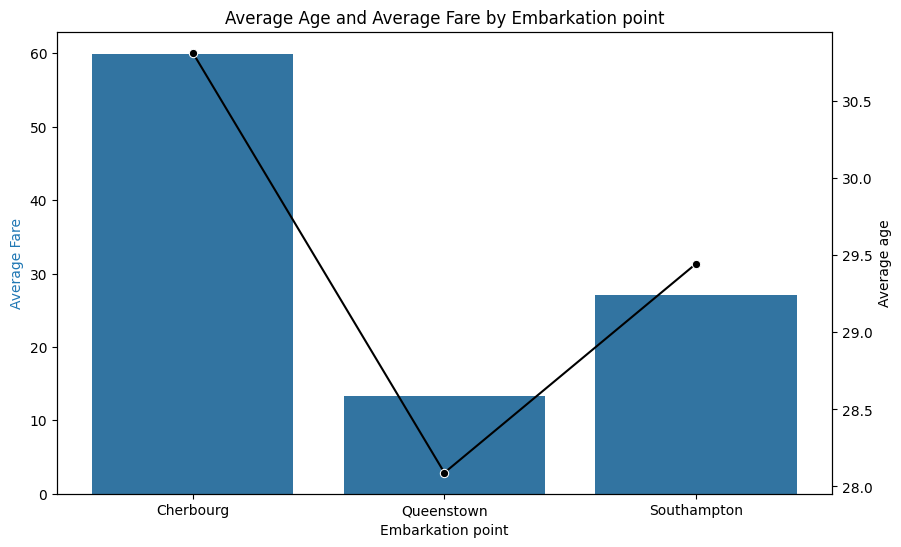

In [39]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel('Embarkation point')
ax1.set_ylabel('Average Fare', color='tab:blue')
sb.barplot(x='Embarked', y='Fare', data=passenger_embarked_info, ax=ax1, color='tab:blue')

ax2 = ax1.twinx()
color='black'
ax2.set_ylabel('Average age', color=color)
sb.lineplot(x='Embarked', y='Age', data=passenger_embarked_info, ax=ax2, sort=False, color=color, marker='o')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.title("Average Age and Average Fare by Embarkation point")
plt.show()

In [40]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    float64
 9   FamilySize   891 non-null    int64  
 10  isAlone      891 non-null    int32  
dtypes: float64(3), int32(1), int64(7)
memory usage: 73.2 KB


In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X



In [42]:
class EmbarkedImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Embarked'] = imputer.fit_transform(X[['Embarked']])
        return X

In [43]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["PassengerId"], axis=1, errors="ignore")

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()), ("embarkedimputer", EmbarkedImputer()), ("featuredropper", FeatureDropper())])

In [46]:
training_set_final = pipeline.fit_transform(numeric_data)

In [47]:
training_set_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    float64
 8   FamilySize  891 non-null    int64  
 9   isAlone     891 non-null    int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 66.3 KB


In [86]:
# save the processed training data to a csv files
training_set_final.to_csv("data/processed_train_data.csv", index=False)

In [48]:
training_set_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
0,0,3,0,22.000000,1,0,7.2500,2.0,2,0
1,1,1,1,38.000000,1,0,71.2833,0.0,2,0
2,1,3,1,26.000000,0,0,7.9250,2.0,1,1
3,1,1,1,35.000000,1,0,53.1000,2.0,2,0
4,0,3,0,35.000000,0,0,8.0500,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,2.0,1,1
887,1,1,1,19.000000,0,0,30.0000,2.0,1,1
888,0,3,1,29.699118,1,2,23.4500,2.0,4,0
889,1,1,0,26.000000,0,0,30.0000,0.0,1,1


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler

X = training_set_final.drop(['Survived'], axis=1)
Y = training_set_final['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [51]:
X_data

array([[ 0.82737724, -0.73769513, -0.5924806 , ...,  0.58749932,
         0.05915988, -1.2316449 ],
       [-1.56610693,  1.35557354,  0.63878901, ..., -1.94173503,
         0.05915988, -1.2316449 ],
       [ 0.82737724,  1.35557354, -0.2846632 , ...,  0.58749932,
        -0.56097483,  0.81192233],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ...,  0.58749932,
         1.29942929, -1.2316449 ],
       [-1.56610693, -0.73769513, -0.2846632 , ..., -1.94173503,
        -0.56097483,  0.81192233],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.67711786,
        -0.56097483,  0.81192233]])

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators" : [10, 100, 1000], "max_depth" : [None, 5, 10], "min_samples_split" : [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='accuracy')

In [63]:
final_clf = grid_search.best_estimator_

In [64]:
training_set_final = pipeline.fit_transform(training_set_final)

In [65]:
training_set_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,isAlone
0,0,3,0,22.000000,1,0,7.2500,2.0,2,0
1,1,1,1,38.000000,1,0,71.2833,0.0,2,0
2,1,3,1,26.000000,0,0,7.9250,2.0,1,1
3,1,1,1,35.000000,1,0,53.1000,2.0,2,0
4,0,3,0,35.000000,0,0,8.0500,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,2.0,1,1
887,1,1,1,19.000000,0,0,30.0000,2.0,1,1
888,0,3,1,29.699118,1,2,23.4500,2.0,4,0
889,1,1,0,26.000000,0,0,30.0000,0.0,1,1


In [66]:
X_test = training_set_final.drop(['Survived'], axis=1)
Y_test = training_set_final['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

In [67]:
final_clf.score(X_data_test, Y_data_test)

0.936026936026936

the model is returning an accuracy of 93.6% on the training data set
 
we shall now run the model on the test data and check our results

In [69]:
titanic_test_data = pd.read_csv("data/test.csv")

In [70]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [71]:
# preprocess the test data
titanic_test_data['FamilySize'] = titanic_test_data['SibSp'] + titanic_test_data['Parch'] + 1
titanic_test_data['isAlone'] = (titanic_test_data['FamilySize'] == 1).astype(int)
titanic_test_data['Sex'] = titanic_test_data['Sex'].map({'male': 0, 'female': 1})
titanic_test_data['Embarked'] = titanic_test_data['Embarked'].map({'C': 0, 'Q': 1, 'S' : 2})

In [72]:
test_numeric_data = titanic_test_data.select_dtypes(include=[float, int])

In [73]:
titanic_test_data = pipeline.fit_transform(test_numeric_data)

In [75]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked    418 non-null    float64
 7   FamilySize  418 non-null    int64  
 8   isAlone     418 non-null    int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 27.9 KB


In [76]:
X_final_test = titanic_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()

X_data_final_test = scaler.fit_transform(X_final_test)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_41664\2263789515.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [85]:
# save the processed test data to a file
processed_test_data = X_final_test
processed_test_data.to_csv("data/processed_test_data.csv", index=False)

In [77]:
predictions = final_clf.predict(X_data_final_test)

In [79]:
pids = pd.read_csv("data/test.csv")['PassengerId']

In [81]:
final_df = pd.DataFrame(pids)
final_df['Survived'] = predictions
final_df.to_csv("data/predictions_RF.csv", index=False)

In [82]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
